In [6]:
### Add noise to the original data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
function='tanh'
file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
display(d)
print(d.index.stop)

,x1,y,rep
0,-4.00,0.000000,0.0
1,-3.95,0.000344,0.0
2,-3.90,0.000711,0.0
3,-3.85,0.001102,0.0
4,-3.80,0.001519,0.0
...,...,...,...
1595,3.75,0.999019,9.0
1596,3.80,0.998911,9.0
1597,3.85,0.998800,9.0
1598,3.90,0.998686,9.0


1600


In [5]:
#Generate noise
np.random.seed(seed=1111)

mean=0;sigma=0.001;sample=d.index.stop
noise = np.random.normal(mean,sigma,sample)
display(noise)

array([-0.00130001, -0.00107299,  0.0007902 , ..., -0.00229745,
        0.00089182,  0.00099845])

In [6]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)
d.to_csv('../data/'+ 'NN_noisy_signal_' + function + '_sigma_' + str(sigma) + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,-0.001300,-0.001300
1,-3.95,0.000344,0.0,-0.001073,-0.000729
2,-3.90,0.000711,0.0,0.000790,0.001501
3,-3.85,0.001102,0.0,-0.000878,0.000224
4,-3.80,0.001519,0.0,0.001502,0.003021
...,...,...,...,...,...
1595,3.75,0.999019,9.0,0.000060,0.999079
1596,3.80,0.998911,9.0,0.000469,0.999380
1597,3.85,0.998800,9.0,-0.002297,0.996502
1598,3.90,0.998686,9.0,0.000892,0.999578


,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,-0.001300,-0.001300
1,-3.95,0.000344,0.0,-0.001073,-0.000729
2,-3.90,0.000711,0.0,0.000790,0.001501
3,-3.85,0.001102,0.0,-0.000878,0.000224
4,-3.80,0.001519,0.0,0.001502,0.003021
...,...,...,...,...,...
155,3.75,0.936019,0.0,-0.001446,0.934573
156,3.80,0.934167,0.0,-0.001171,0.932996
157,3.85,0.932371,0.0,-0.001413,0.930958
158,3.90,0.930632,0.0,0.001306,0.931937


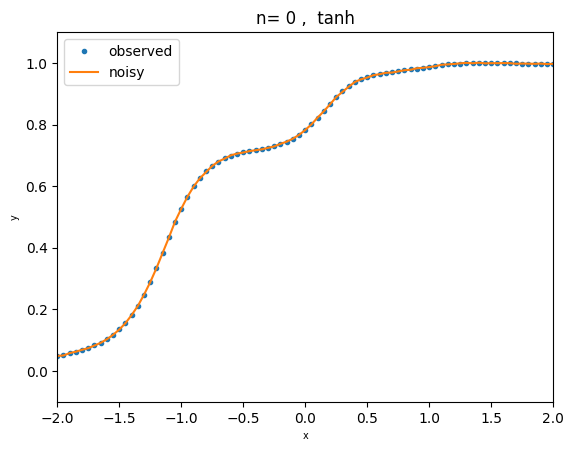

In [7]:
n=0
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed')
plt.plot(dn.x1,dn.y_noise,label='noisy')
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='noisy_signal_' + function + '_' + str(n)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)